In [27]:
from collections import Counter
from itertools import chain, combinations
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set(font_scale=2)

# Load one Python contents file for EDA
JSON to Pandas

In [28]:
filename = 'data/contents_py_000000000000'

In [29]:
data = []
for line in open(filename, 'r'):
    data.append(json.loads(line))

In [4]:
data[0]

{u'binary': True,
 u'copies': u'1',
 u'id': u'910bd1ad171208ad137568fcfe61d19490863131',
 u'sample_path': u'venv/lib/python2.7/site-packages/django/utils/synch.py',
 u'sample_repo_name': u'andreamdp/residencias',
 u'size': u'2768'}

In [5]:
data[1]

{u'binary': False,
 u'copies': u'1',
 u'id': u'fe1417ea673edb9d883b3ab526ef187f38986dc7',
 u'sample_path': u'unittest/test_starmap1.py',
 u'sample_repo_name': u'm1griffin/arrayfunc',
 u'size': u'7863035'}

In [30]:
df = pd.read_json(json.dumps(data), orient='records')

In [70]:
df.head()

,binary,content,copies,id,sample_path,sample_repo_name,size
24813,False,# This program is free software; you can redis...,235,336f68438e751e56df9b3310283c5376dd4e9d23,suds/mx/basic.py,rootart/python-suds-fork,1657
24814,False,# mock.py\n# Test tools for mocking and patchi...,750,073869a1f12a3b7e5bbd6d09ac50c861ebfc90ae,static/Brython3.1.1-20150328-091302/Lib/unitte...,40223108/-2015cd_midterm,71473
24815,False,# Software License Agreement (BSD License)\n#\...,244,372c1df45e25fd6b284d384b1b606ec23f776c95,mk/PX4/Tools/genmsg/src/genmsg/deps.py,aaddaamm30/auto_quad,3993
24816,False,# Software License Agreement (BSD License)\n#\...,244,4478dbcd5c84928e598dc037b7f33f4b9033bfe9,mk/PX4/Tools/genmsg/src/genmsg/template_tools.py,guludo/ardupilot-1,9443
24817,False,# -*- encoding: utf-8 -*-\n###################...,247,d5b1c298c0b25ee6ce5d0e7f3543b7475cc96c16,addons/account_asset/account_asset_invoice.py,0k/odoo,3070


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24818 entries, 0 to 24817
Data columns (total 7 columns):
binary              24818 non-null bool
content             24804 non-null object
copies              24818 non-null int64
id                  24818 non-null object
sample_path         24818 non-null object
sample_repo_name    24818 non-null object
size                24818 non-null int64
dtypes: bool(1), int64(2), object(4)
memory usage: 1.3+ MB


In [10]:
# Remove rows without content
df = df[df['content'].notnull()]

# Extract package names from code content
- from () import module
- import ()
For the full analysis, package names were extracted BigQuery using REGEXP_EXTRACT.

In [116]:
def extract_package_names(df):
    '''
    Input (df): Pandas dataframe with code content column named 'content'
    Output (df): Dataframe with added column of lists - of packages imported for each code content
    '''
    # Match package names following 'from' or following 'import', but not those following 'from ... import'
    df['packages'] = df['content'].str.findall(r"from ([\w-]+) import [\w*-]+|import ([\w-]+)")
    # Flatten packages into one list
    df['packages'] = df['packages'].apply(lambda x: list(set([i for i in chain.from_iterable(x) if i != ''])))
    # NaN for rows with no package imports 
    df['packages'] = df['packages'].map(lambda x: np.NaN if len(x)==0 else x)
    return df

In [117]:
df = extract_package_names(df)

In [75]:
df.head()

,binary,content,copies,id,sample_path,sample_repo_name,size,packages
12,False,#!/usr/bin/env python\nimport os\nimport sys\n...,1,57bd95b174f569a8a8463182feb9f85cab63a1a8,manage.py,allenmyao/cs242-message-board,256,"[os, sys, execute_from_command_line]"
13,False,class TRECS_IMAGE(DataClassification):\n na...,1,8dd5ebb2bac27e9762e3c56fb00234a09ecc3806,trunk/dontload-astrodata_Gemini/ADCONFIG_Gemin...,pyrrho314/recipesystem,256,NaN
14,False,import urllib2\n\ni = 1\ncon = urllib2.urlopen...,1,6d158b74c2e67e6f597b77c2f329374c94953937,scripts/img.py,XiaJieCom/change,256,[urllib2]
15,False,"# -*- coding: utf-8 -*-\n\n""""""\nFunctions for ...",1,68115582fcec043538bd6524b464522f8eac6ca5,sheldon/utils/logger.py,sevazhidkov/sheldon,512,[logging]
16,False,# OeQ autogenerated correlation for 'Window/Wa...,1,d270c4864c14f32fbd7ded07e5a3191c11112480,mole/stat_corr/window_wall_ratio_east_AVG_by_b...,UdK-VPT/Open_eQuarter,512,"[math, numpy, oeqCorrelation]"


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24804 entries, 12 to 24817
Data columns (total 8 columns):
binary              24804 non-null bool
content             24804 non-null object
copies              24804 non-null int64
id                  24804 non-null object
sample_path         24804 non-null object
sample_repo_name    24804 non-null object
size                24804 non-null int64
packages            22648 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 1.5+ MB


In [79]:
# Remove code contents with no package imports
df = df[df['packages'].notnull()]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22648 entries, 12 to 24817
Data columns (total 8 columns):
binary              22648 non-null bool
content             22648 non-null object
copies              22648 non-null int64
id                  22648 non-null object
sample_path         22648 non-null object
sample_repo_name    22648 non-null object
size                22648 non-null int64
packages            22648 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 1.4+ MB


# Plot top 20 package counts

In [100]:
# Count packages
pkg_counter = Counter(chain(*(df['packages'].values)))
# pkg_counter = sorted(pkg_counter.items(), key=lambda x: -x[1])

In [138]:
# Plot top 30
def plot_top(counter, n=30, title='Packages'):
    '''
    Input (df_series): Pandas series of list of packages imported in code content
    Input (n): top n packages by count to plot
    Output: bar plot by count
    '''
    plot_df = pd.DataFrame(counter.most_common(n))
    plot_df.columns = ['package', 'count']
    g = sns.factorplot(x='package', y='count', data=plot_df, kind='bar', aspect=2, size=6)
    g.set_xticklabels(rotation=90)
    plt.title('Count of Top {} {}'.format(n, title))
    plt.show()

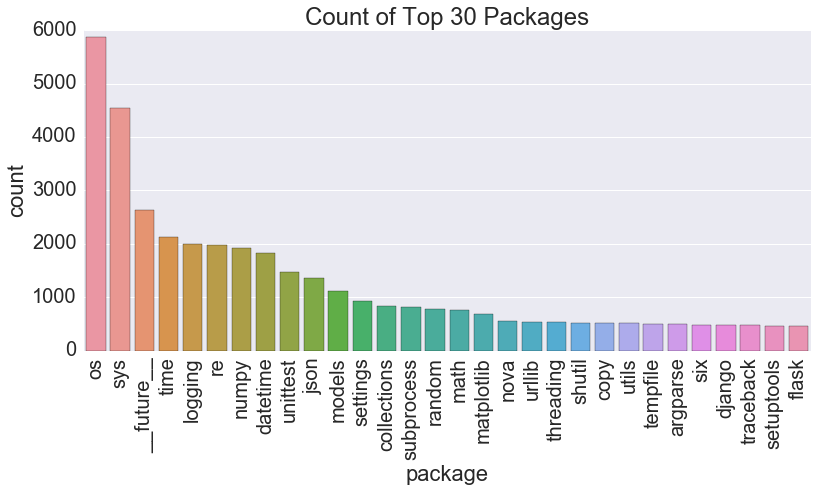

In [139]:
plot_top(pkg_counter, 30, 'Packages')

# Create edge list and write to .tsv file

In [132]:
pkg_edges = []

f = open('pkg_edges.tsv', 'w')

for linked_pkgs in df['packages']:
    for pkg_edge in combinations(linked_pkgs, 2):
        # Append edge to list
        pkg_edges.append(tuple(sorted(pkg_edge)))
        # Write edge to file
        f.write("{}\t{}\n".format(pkg_edge[0], pkg_edge[1]))

f.close()

In [122]:
# Count package pairs (edges)
pkg_edge_counter = Counter(pkg_edges)

In [136]:
pkg_edge_counter.most_common(10)

[((u'os', u'sys'), 2144),
 ((u'os', u're'), 867),
 ((u'os', u'time'), 856),
 ((u'logging', u'os'), 770),
 ((u'sys', u'time'), 742),
 ((u're', u'sys'), 657),
 ((u'os', u'subprocess'), 607),
 ((u'logging', u'sys'), 522),
 ((u'__future__', u'os'), 520),
 ((u'datetime', u'os'), 512)]

# Plot top 30 package co-occurences in a file

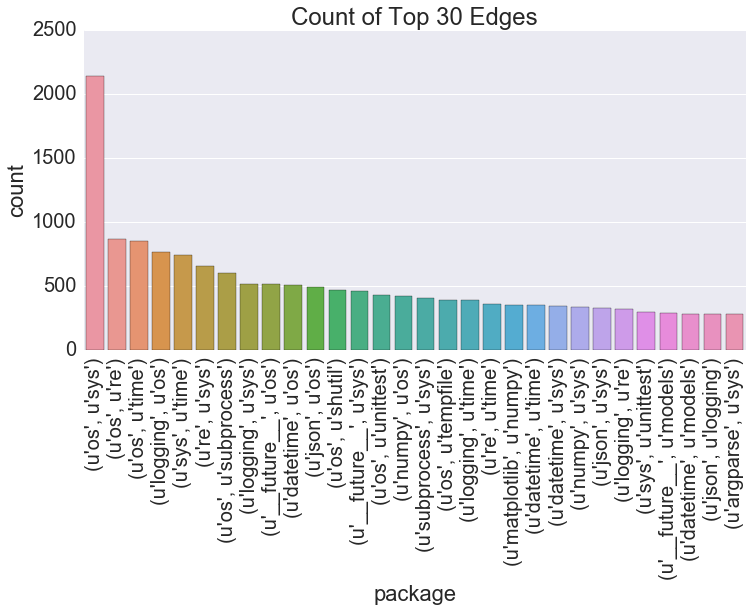

In [140]:
plot_top(pkg_edge_counter, 30, 'Edges')

In [19]:
df_from = pd.DataFrame(list(df['pkg_from'].apply(lambda x: tuple(set(x))).values))

In [20]:
df_from.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,django,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [21]:
df_import = pd.DataFrame(list(df['pkg_import'].apply(lambda x: tuple(set(x))).values))

In [22]:
df_import.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,sys,os,execute_from_command_line,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,urllib2,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,logging,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,numpy,oeqCorrelation,math,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
